# Load Libraries and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv('df.csv')

In [3]:
df.head()

,Unnamed: 0,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


# Data Cleaning & EDA 

In [4]:
df.shape

(150000, 18)

In [5]:
df.isnull().sum()

Unnamed: 0                                            0
VIN (1-10)                                            0
County                                                0
City                                                  0
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                       14
Base MSRP                                            14
Legislative District                                 84
DOL Vehicle ID                                        0
Vehicle Location                                      2
Electric Utility                                      0
2020 Census Tract                               

In [6]:
df.duplicated().sum()

0

In [7]:
# If we drop null values, then less than 1% data is drop, so we not fill the null values

len(df.dropna())/len(df)

0.9993333333333333

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(149900, 18)

In [10]:
# THe 'Unnamed: 0' column is not imp, so we drop it

df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df.shape

(149900, 17)

C:\Users\susha\AppData\Local\Temp\ipykernel_14740\1150689155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Make", palette="viridis")


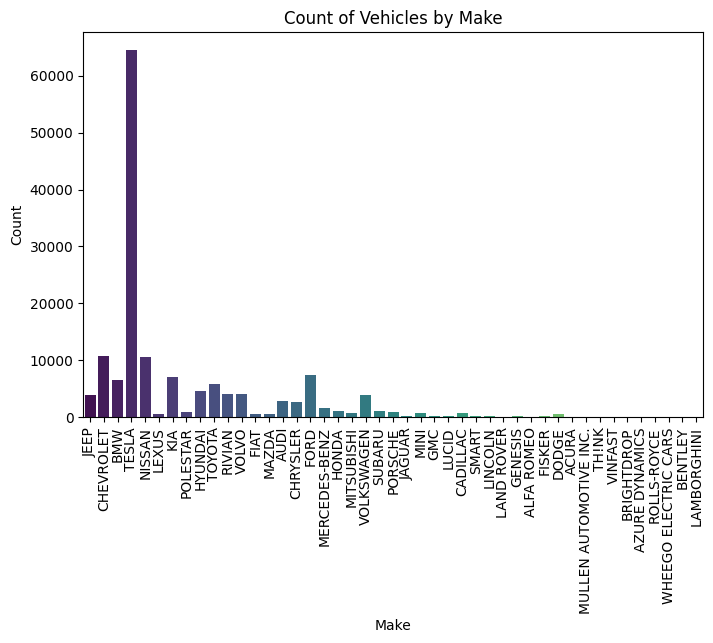

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Make", palette="viridis")
plt.title("Count of Vehicles by Make")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

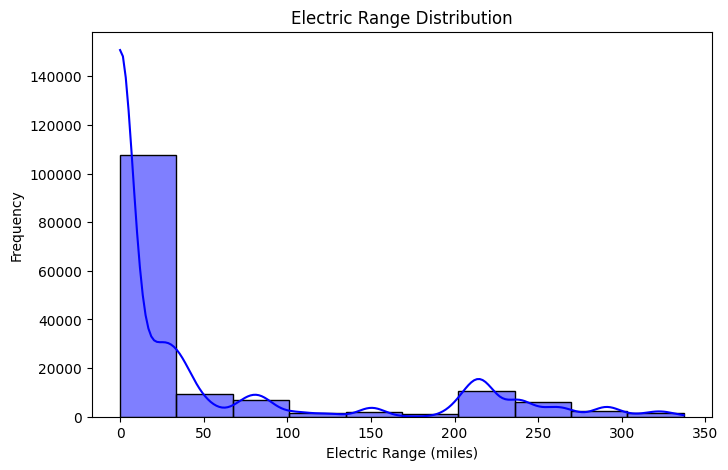

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Electric Range", kde=True, bins=10, color="blue")
plt.title("Electric Range Distribution")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()

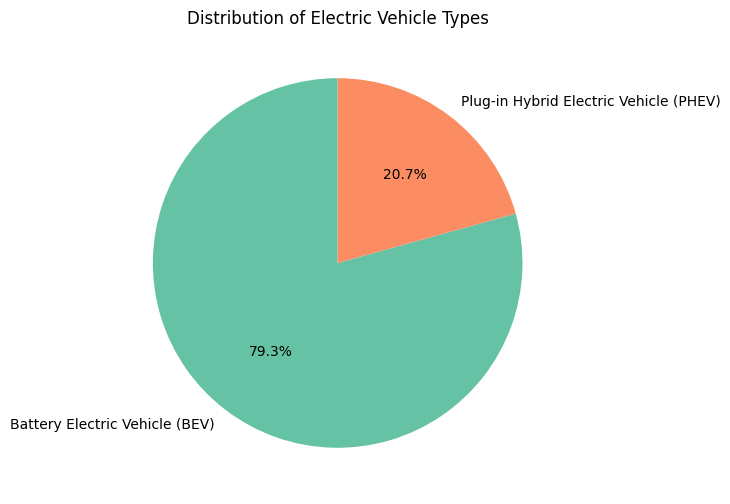

In [14]:
df['Electric Vehicle Type'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"), figsize=(6, 6)
)
plt.title("Distribution of Electric Vehicle Types")
plt.ylabel("")
plt.show()

C:\Users\susha\AppData\Local\Temp\ipykernel_14740\314046980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Model Year", y="Electric Range", palette="coolwarm")


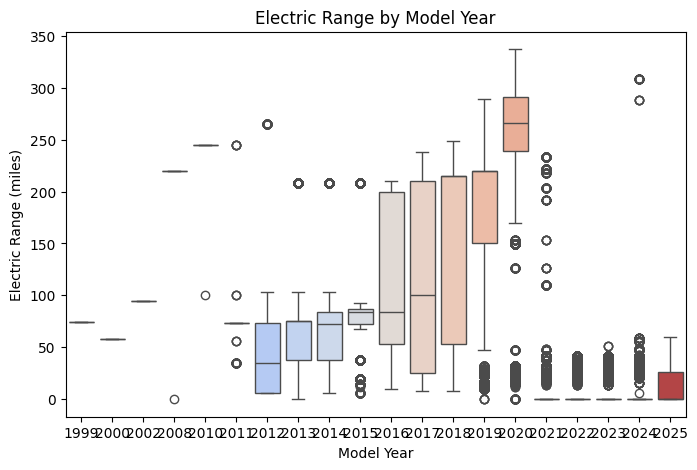

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Model Year", y="Electric Range", palette="coolwarm")
plt.title("Electric Range by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.show()

C:\Users\susha\AppData\Local\Temp\ipykernel_14740\62855898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Electric Vehicle Type", y="Electric Range", palette="muted")


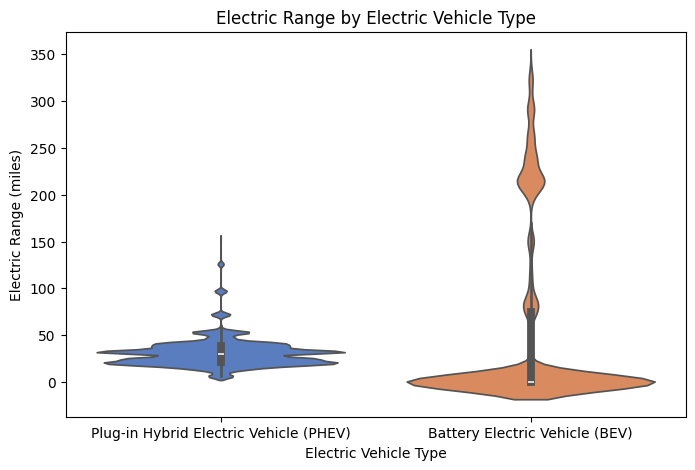

In [16]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Electric Vehicle Type", y="Electric Range", palette="muted")
plt.title("Electric Range by Electric Vehicle Type")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Electric Range (miles)")
plt.show()

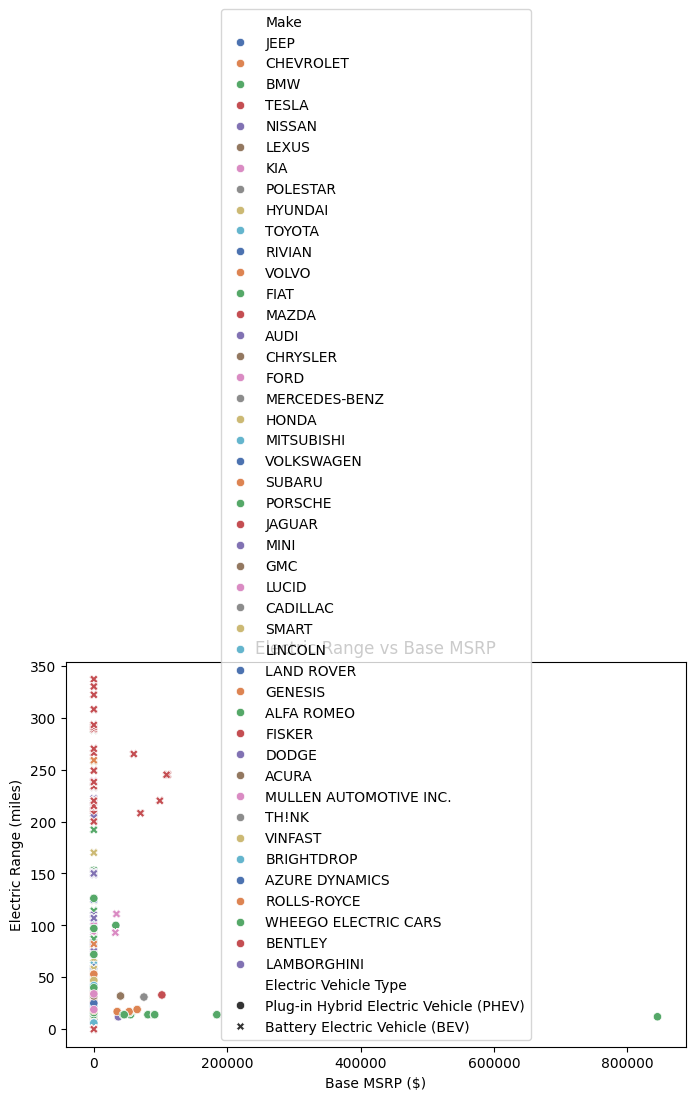

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Base MSRP", y="Electric Range", hue="Make", style="Electric Vehicle Type", palette="deep")
plt.title("Electric Range vs Base MSRP")
plt.xlabel("Base MSRP ($)")
plt.ylabel("Electric Range (miles)")
plt.show()

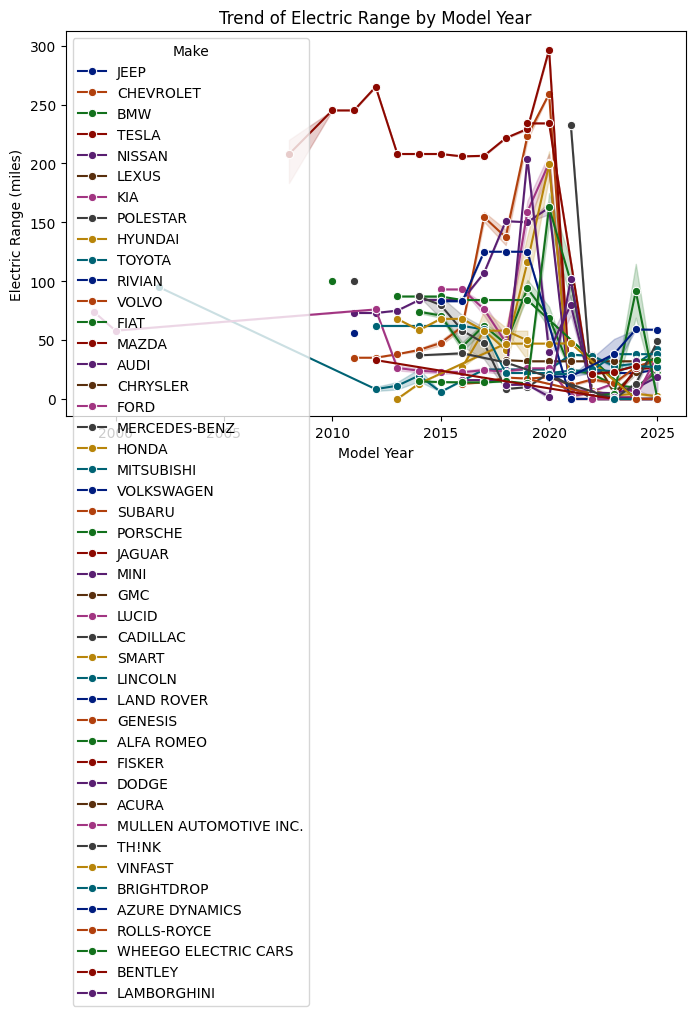

In [18]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="Model Year", y="Electric Range", marker="o", hue="Make", palette="dark")
plt.title("Trend of Electric Range by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.show()

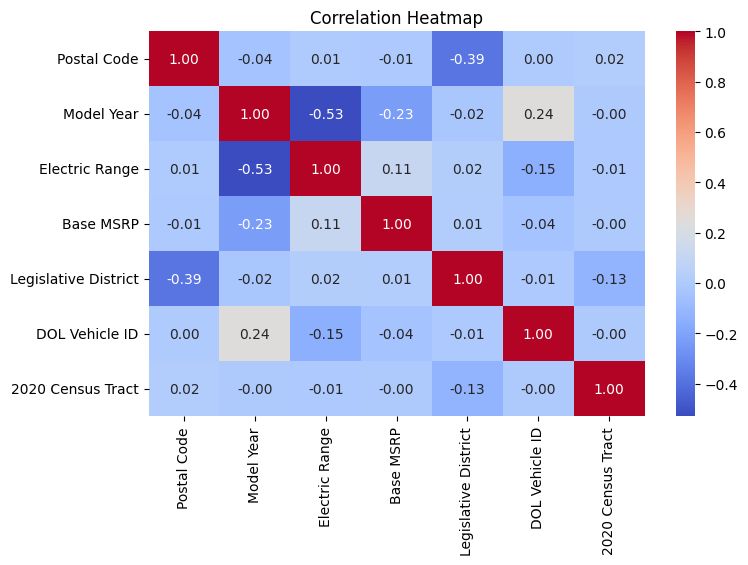

In [19]:
plt.figure(figsize=(8, 5))
corr_matrix = df.corr(numeric_only=True)  # Compute correlations for numeric columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print("Dataset after Label Encoding:")
print(df)

Dataset after Label Encoding:
        VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
0               31      17   290      0      98370.0        2023    19    152   
1              803      30   182      0      98258.0        2019     8     18   
2             9643      16   329      0      98116.0        2015     5     72   
3             3874      16   329      0      98178.0        2019    38     91   
4             4430      38   334      0      98942.0        2015    38     92   
...            ...     ...   ...    ...          ...         ...   ...    ...   
149995        5515      36    23      0      98225.0        2023    38     94   
149996        2401      30   228      0      98272.0        2014    13     58   
149997        4304      16   171      0      98030.0        2024    38     92   
149998        3860      16   329      0      98133.0        2021    38     91   
149999        3802      16   209      0      98038.0        2019    38     91  

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Apply MinMaxScaler to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Dataset after Min-Max Scaling:")
print(df)

Dataset after Min-Max Scaling:
        VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
0               31      17   290      0     0.263195    0.923077    19    152   
1              803      30   182      0     0.183310    0.769231     8     18   
2             9643      16   329      0     0.082026    0.615385     5     72   
3             3874      16   329      0     0.126248    0.769231    38     91   
4             4430      38   334      0     0.671184    0.615385    38     92   
...            ...     ...   ...    ...          ...         ...   ...    ...   
149995        5515      36    23      0     0.159772    0.923077    38     94   
149996        2401      30   228      0     0.193295    0.576923    13     58   
149997        4304      16   171      0     0.020685    0.961538    38     92   
149998        3860      16   329      0     0.094151    0.846154    38     91   
149999        3802      16   209      0     0.026391    0.769231    38     91 

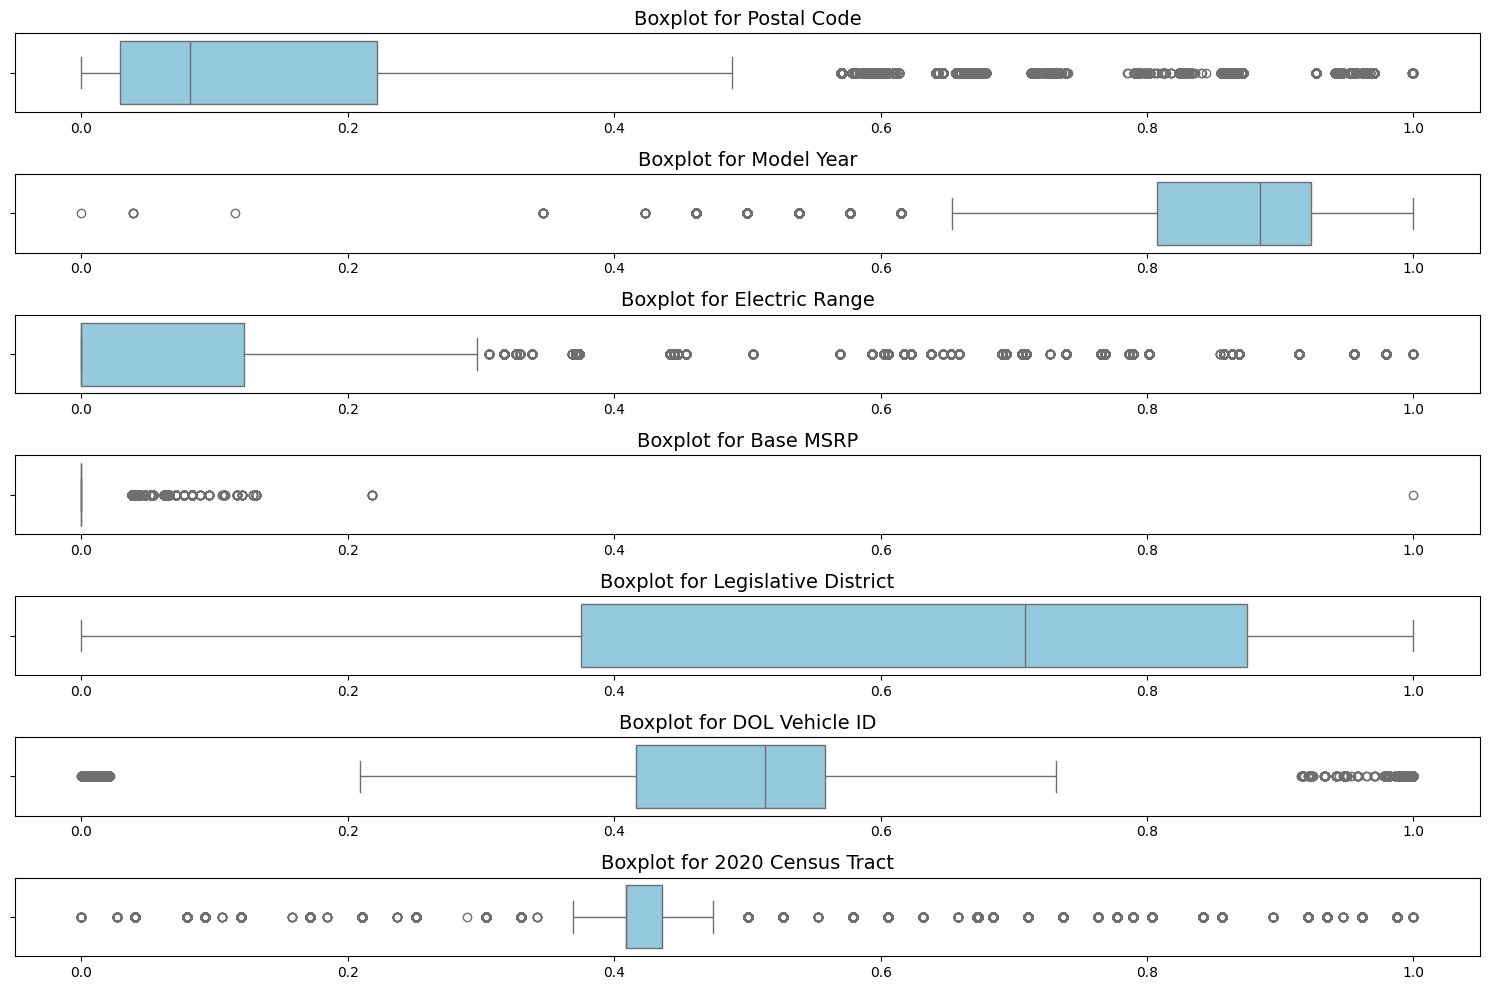

In [24]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=14)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

In [25]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows within bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers from all numerical columns
for col in numerical_columns:
    df = remove_outliers_iqr(df, col)

print("Dataset after removing outliers:")
print(df)

Dataset after removing outliers:
        VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
29            3645      16   329      0     0.084165    0.846154     5    154   
66            3580      16   329      0     0.072040    0.961538     5    154   
118           3665      16   329      0     0.141227    0.923077     5    154   
124           3650      16   329      0     0.074180    0.923077     5    154   
240          10781      16   329      0     0.126248    0.884615    42     78   
...            ...     ...   ...    ...          ...         ...   ...    ...   
149967         142      16   329      0     0.076320    0.884615    19     63   
149988        9418      16   300      0     0.035663    0.961538     5     83   
149994        7974      16   303      0     0.037090    0.923077    20    140   
149997        4304      16   171      0     0.020685    0.961538    38     92   
149998        3860      16   329      0     0.094151    0.846154    38     9

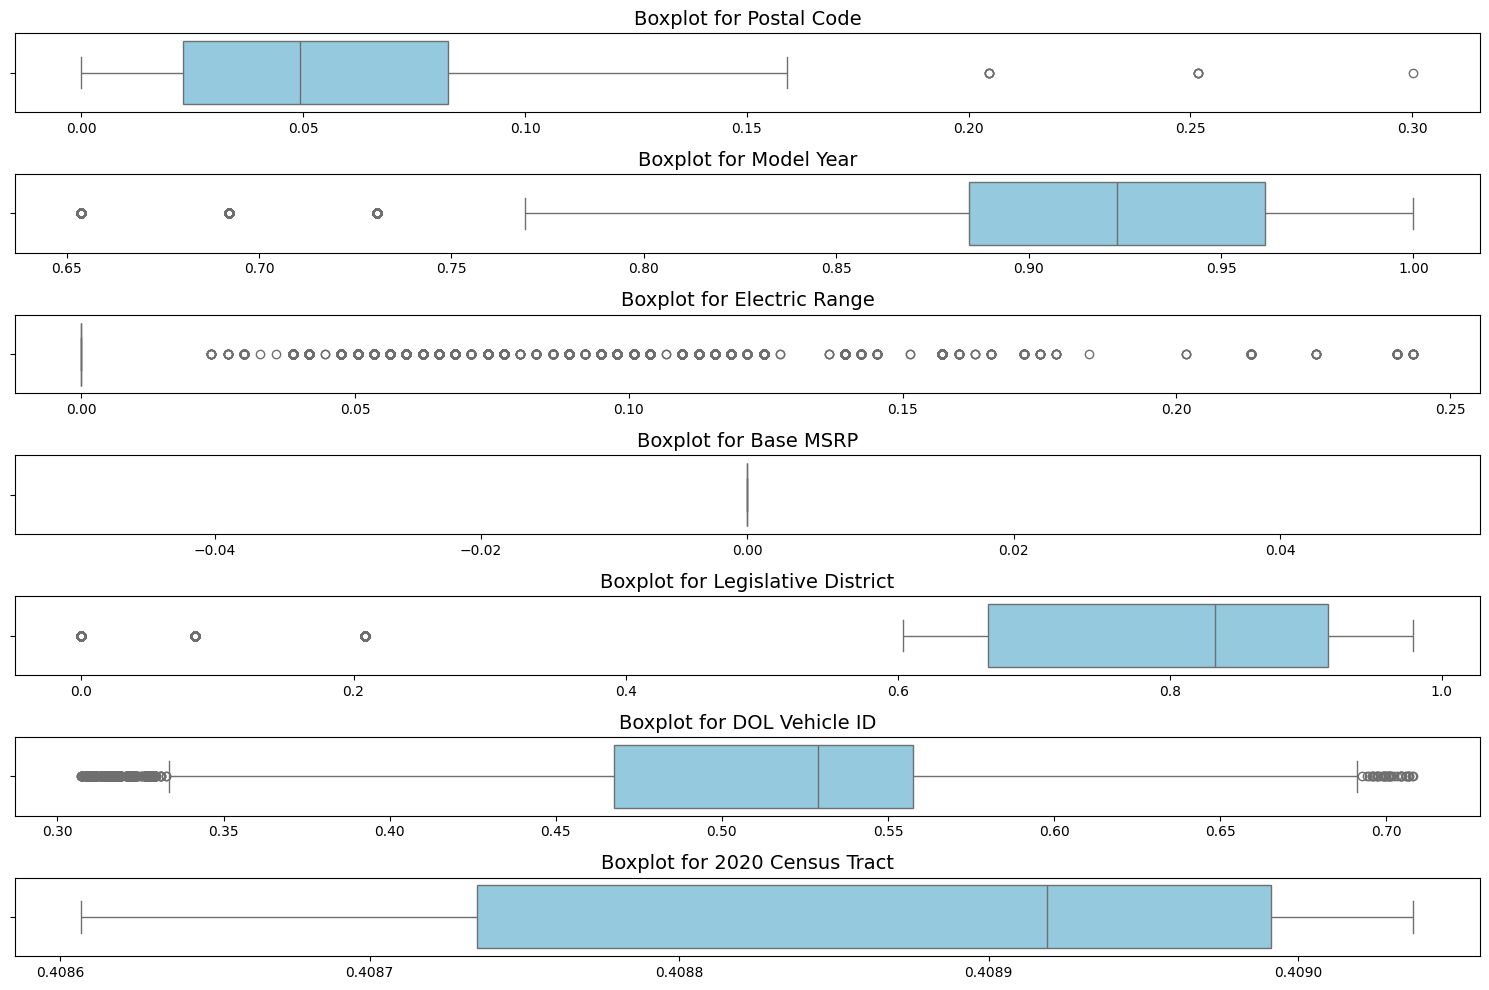

In [26]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=14)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

In [27]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
29,3645,16,329,0,0.084165,0.846154,5,154,1,0,0.089021,0.0,0.729167,0.511405,317,55,0.408696
66,3580,16,329,0,0.072040,0.961538,5,154,1,0,0.115727,0.0,0.875000,0.575243,293,55,0.408692
118,3665,16,329,0,0.141227,0.923077,5,154,1,0,0.089021,0.0,0.729167,0.468987,328,55,0.408679
124,3650,16,329,0,0.074180,0.923077,5,154,1,0,0.089021,0.0,0.937500,0.480658,285,55,0.408660
240,10781,16,329,0,0.126248,0.884615,42,78,0,1,0.000000,0.0,0.750000,0.440945,256,55,0.408762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149967,142,16,329,0,0.076320,0.884615,19,63,1,2,0.074184,0.0,0.208333,0.502035,279,55,0.408742
149988,9418,16,300,0,0.035663,0.961538,5,83,0,1,0.000000,0.0,0.083333,0.526636,195,71,0.409020
149994,7974,16,303,0,0.037090,0.923077,20,140,1,0,0.100890,0.0,0.916667,0.524047,204,71,0.409031
149997,4304,16,171,0,0.020685,0.961538,38,92,0,1,0.000000,0.0,0.958333,0.565934,239,71,0.408994


# Model Building

In [28]:
X = df.drop('Electric Vehicle Type', axis=1)  # Replace 'Target' with the actual target column name
y = df['Electric Vehicle Type']  # Replace 'Target' with the actual target column name

In [29]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define a list of classifiers

classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(probability=True)),
    ('Dummy Classifier', DummyClassifier(strategy='most_frequent')),
    ('Voting Classifier', VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ], voting='soft'))
]

In [31]:
# Initialize results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

In [32]:
# Apply each classifier and evaluate performance
for name, clf in classifiers:
    # Cross-validation score
    cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    

C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.881284   0.877083  0.881284  0.868143  0.819874
1                  KNN  0.993450   0.993451  0.993450  0.993450  0.996176
2        Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
3        Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
4    Gradient Boosting  1.000000   1.000000  1.000000  1.000000  1.000000
5             AdaBoost  1.000000   1.000000  1.000000  1.000000  1.000000
6          Naive Bayes  0.998307   0.998322  0.998307  0.998310  0.999361
7                  SVM  0.842570   0.833943  0.842570  0.808947  0.824639
8     Dummy Classifier  0.806580   0.650571  0.806580  0.720224  0.500000
9    Voting Classifier  0.936778   0.939830  0.936778  0.932265  0.997457


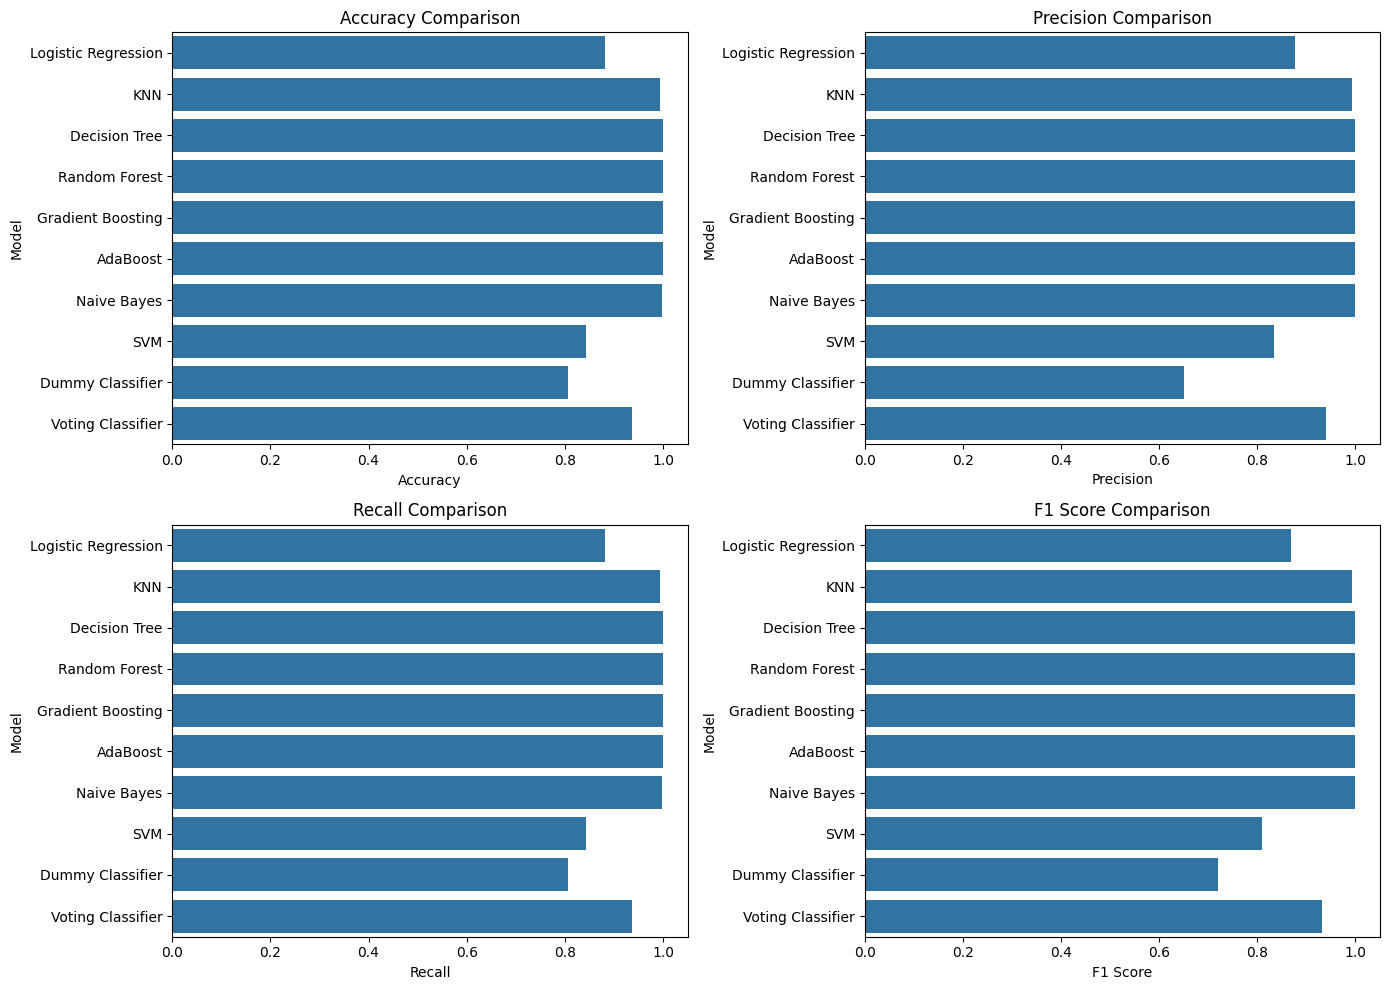

In [34]:
from sklearn.preprocessing import LabelBinarizer

# Check if the problem is binary or multi-class
is_binary = len(y.unique()) == 2  # Check if it's a binary classification problem

# Evaluate the models
for name, clf in classifiers:
    # Cross-validation score
    cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Calculate ROC AUC score for multi-class (One-vs-Rest)
    if not is_binary:  # Only compute ROC AUC for multi-class problems
        lb = LabelBinarizer()
        lb.fit(y)
        y_test_bin = lb.transform(y_test)
        y_pred_prob = clf.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr', average='weighted')
    else:  # For binary classification, use the original approach
        y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['ROC AUC'].append(roc_auc)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot the comparison of models' performance using accuracy, precision, recall, and F1 Score
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Plot
sns.barplot(x='Accuracy', y='Model', data=results_df, ax=ax[0, 0])
ax[0, 0].set_title('Accuracy Comparison')

# Precision Plot
sns.barplot(x='Precision', y='Model', data=results_df, ax=ax[0, 1])
ax[0, 1].set_title('Precision Comparison')

# Recall Plot
sns.barplot(x='Recall', y='Model', data=results_df, ax=ax[1, 0])
ax[1, 0].set_title('Recall Comparison')

# F1 Score Plot
sns.barplot(x='F1 Score', y='Model', data=results_df, ax=ax[1, 1])
ax[1, 1].set_title('F1 Score Comparison')

plt.tight_layout()
plt.show()

C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



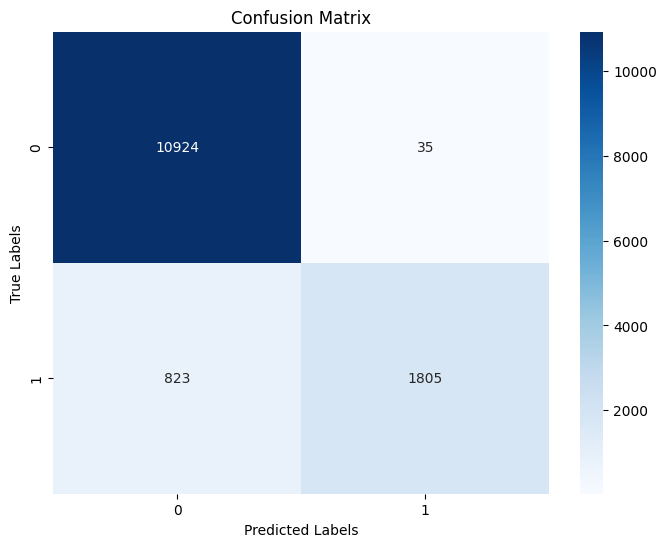

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Fit the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()